In [1]:
!pip install pystan
!pip install fbprophet
!pip install prophet

     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639720 sha256=2b746add28840c4a9c829140b9baf288e8da38a47bc72676e7064cdfa876519b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('MoneyManager.csv')

In [4]:
df = df[df.Category != "Income"] 
df = df[df.Category != "income"] 
df.Amount = df.Amount*(-1)

In [5]:
def timestamp(x):
    return datetime.strptime(x, "%d-%m-%Y")

In [6]:
from datetime import datetime, timedelta,date
df['Date'] = df['Date'].apply(timestamp)
df

,Sr No.,Date,Amount,Description,Category
1,2,2021-07-02,2200,Party to friends,Social Life
2,3,2021-07-03,560,Sapiens(book),Self Development
3,4,2021-07-04,10600,Facewash and other hair produts,Beauty
4,5,2021-07-05,2040,household items,household
5,6,2021-07-06,15000,litle brothers education,Education
...,...,...,...,...,...
149,150,2021-12-27,415,new utensils,Household
150,151,2021-12-28,598,yoga,Self Development
151,152,2021-12-29,40,chocolate,Food
152,153,2021-12-30,50,pen,Other


In [7]:
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Sr No.,Date,Amount,Description,Category
0,2,2021-07-02,2200,Party to friends,Social Life
1,3,2021-07-03,560,Sapiens(book),Self Development
2,4,2021-07-04,10600,Facewash and other hair produts,Beauty
3,5,2021-07-05,2040,household items,household
4,6,2021-07-06,15000,litle brothers education,Education
...,...,...,...,...,...
126,150,2021-12-27,415,new utensils,Household
127,151,2021-12-28,598,yoga,Self Development
128,152,2021-12-29,40,chocolate,Food
129,153,2021-12-30,50,pen,Other


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date'] = df['Date'].dt.year.astype('str') + '-' + df['Date'].dt.month.astype('str') + '-01'
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.groupby('Date').Amount.sum().reset_index()
df

,Date,Amount
0,2021-07-01,67100
1,2021-08-01,13270
2,2021-09-01,60805
3,2021-10-01,7544
4,2021-11-01,56029
5,2021-12-01,7710


In [11]:
df.columns = ['ds', 'y']
df

,ds,y
0,2021-07-01,67100
1,2021-08-01,13270
2,2021-09-01,60805
3,2021-10-01,7544
4,2021-11-01,56029
5,2021-12-01,7710


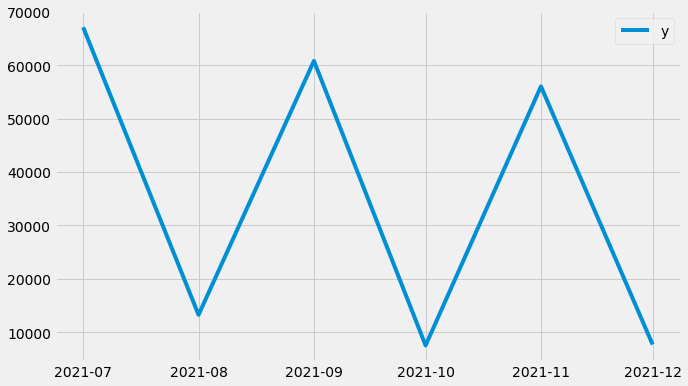

In [12]:

plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['y'])

In [13]:
import numpy as np

mean = df['y'].mean(axis=0)
df['y'] -= mean
std = df['y'].std(axis=0)
df['y'] /= std
df.head()

,ds,y
0,2021-07-01,1.105557
1,2021-08-01,-0.772370
2,2021-09-01,0.885948
3,2021-10-01,-0.972129
4,2021-11-01,0.719332


In [14]:
train = df.drop(df.index[-2:])


In [15]:

model = Prophet(growth='linear',daily_seasonality=True,weekly_seasonality=True, changepoint_prior_scale=2)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

model.fit(train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


In [16]:
from pandas import to_datetime
from pandas import DataFrame
future = list()
for i in range(1, 5):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [17]:

forecast = model.predict(future)
forecast.tail().T

,0,1,2,3
ds,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00
trend,-0.803147,-0.900175,-0.987813,-1.084842
yhat_lower,2.86944,0.503109,0.411941,-1.592986
yhat_upper,2.905092,0.56069,0.492177,-1.485329
trend_lower,-0.821175,-0.930492,-1.029312,-1.138956
trend_upper,-0.785523,-0.872911,-0.949076,-1.031299
additive_terms,3.690615,1.433601,1.441253,-0.45403
additive_terms_lower,3.690615,1.433601,1.441253,-0.45403
additive_terms_upper,3.690615,1.433601,1.441253,-0.45403
daily,1.108972,1.108972,1.108972,1.108972


In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,2.887468,2.869440,2.905092
1,2022-02-01,0.533426,0.503109,0.560690
2,2022-03-01,0.453439,0.411941,0.492177
3,2022-04-01,-1.538872,-1.592986,-1.485329


In [19]:
y_true = df['y'][-4:].values
y_pred = forecast['yhat'].values

In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.086


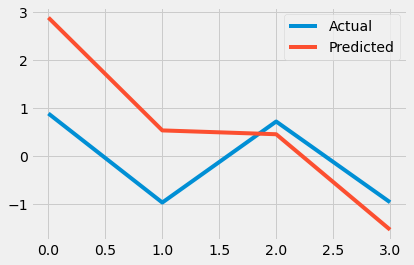

In [21]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

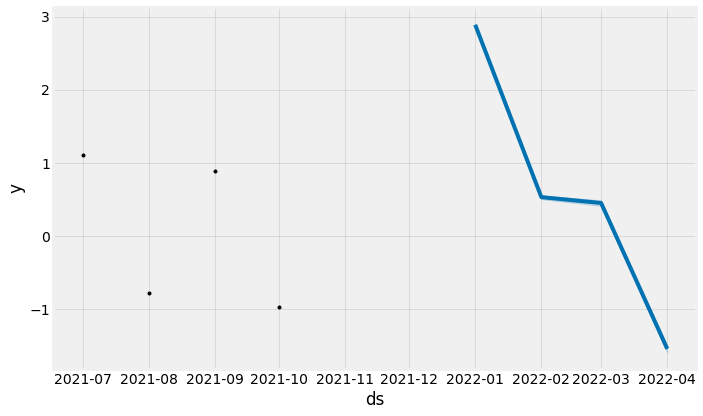

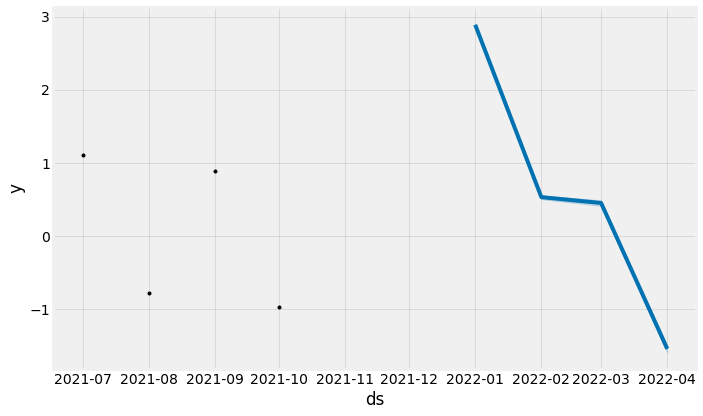

In [22]:
model.plot(forecast)